In [10]:
import urllib2
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
%matplotlib inline

path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'
raw_csv = urllib2.urlopen(path)
feature_names = ('X', 'Y', 'month', 'day', "FFMC", "DMC", 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain')
target_name = 'area'
all_names = feature_names + (target_name,)
df = pd.read_csv(raw_csv)

In [11]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


##[Mission 1] 불이 가장 많이 발생한 지역 좌표 (X, Y) 상위 5개를 제시하시오.
- numpy 및 pandas에서 제공되는 gropyby, sum, stack, sort 등의 메소드 활용 필요

In [12]:
sdf = df[['X', 'Y', 'area']]
sdf

,X,Y,area
0,7,5,0.00
1,7,4,0.00
2,7,4,0.00
3,8,6,0.00
4,8,6,0.00
5,8,6,0.00
6,8,6,0.00
7,8,6,0.00
8,8,6,0.00
9,7,5,0.00


In [13]:
sdf.sort_index(by='area', ascending=False).head(5)

,X,Y,area
238,6,5,1090.84
415,8,6,746.28
479,7,4,278.53
237,1,2,212.88
236,2,2,200.94


# 불이 가장 많이 발생한 지역 좌표 상위 5개
   (6,5), (8,6), (7,4), (1,2), (2,2)

##[Mission 2] 불이 가장 많이 발생한 월 (month) 상위 2개 및 가장 많이 발생한 날 (day) 상위 2개를 제시하시오.
numpy 및 pandas에서 제공되는 gropyby, sum, stack, sort 등의 메소드 활용 필요

In [14]:
sdf = df[['month', 'area']]
sdf

,month,area
0,mar,0.00
1,oct,0.00
2,oct,0.00
3,mar,0.00
4,mar,0.00
5,aug,0.00
6,aug,0.00
7,aug,0.00
8,sep,0.00
9,sep,0.00


In [15]:
sdf.groupby('month').sum().sort_index(by="area",ascending=False).head(2)

,area
month,
sep,3086.13
aug,2297.99


 # 가장 많이 불이 발생한 월
     sep, aug

In [16]:
sdf=df[['day', 'area']]
sdf

,day,area
0,fri,0.00
1,tue,0.00
2,sat,0.00
3,fri,0.00
4,sun,0.00
5,sun,0.00
6,mon,0.00
7,mon,0.00
8,tue,0.00
9,sat,0.00


In [17]:
sdf.groupby('day').sum().sort_index(by="area",ascending=False).head(2)

,area
day,
sat,2144.86
thu,997.10


#가장 많이 불이 발생한 날
sat,thu
# 불이 가장 많이 발생한 달과 날은 다음과 같다
불이 가장 많이 발생한 달 = sep(9월), aug(8월)
불이 가장 많이 발생한 날 = sat(토요일), thu(목요일)

##[Mission 3] 4대 주 요인 (temp, RH, wind, rain) 속성별 기본 통계치 및 Box Plot 산출
numpy 및 pandas에서 제공되는 describe() 및 boxplot() 사용
describe()가 제공하는 통계치 및 boxplot을 보면서 나름대로의 해석을 반드시 3가지이상 제시하시오.
area와의 관계는 고려하지 말고 4가지 속성만 분석하시오.

In [18]:
sdf=df[['temp','RH','wind','rain']]
sdf

,temp,RH,wind,rain
0,8.2,51,6.7,0.0
1,18.0,33,0.9,0.0
2,14.6,33,1.3,0.0
3,8.3,97,4.0,0.2
4,11.4,99,1.8,0.0
5,22.2,29,5.4,0.0
6,24.1,27,3.1,0.0
7,8.0,86,2.2,0.0
8,13.1,63,5.4,0.0
9,22.8,40,4.0,0.0


In [19]:
sdf.describe()

,temp,RH,wind,rain
count,517.000000,517.000000,517.000000,517.000000
mean,18.889168,44.288201,4.017602,0.021663
std,5.806625,16.317469,1.791653,0.295959
min,2.200000,15.000000,0.400000,0.000000
25%,15.500000,33.000000,2.700000,0.000000
50%,19.300000,42.000000,4.000000,0.000000
75%,22.800000,53.000000,4.900000,0.000000
max,33.300000,100.000000,9.400000,6.400000


D:\Canopy\User\lib\site-packages\pandas\tools\plotting.py:2633: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


{'boxes': [<matplotlib.lines.Line2D at 0xb0bc2b0>,
 'caps': [<matplotlib.lines.Line2D at 0xae46080>,
 'fliers': [<matplotlib.lines.Line2D at 0xae55128>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xae46b70>,
 'whiskers': [<matplotlib.lines.Line2D at 0xb0bc4e0>,
  <matplotlib.lines.Line2D at 0xaf9ee80>]}

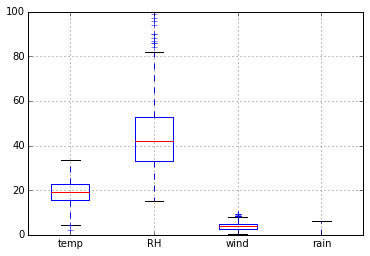

In [20]:
sdf.boxplot()

# 나름대로의 해석
- 온도,습도,풍량은 평균과 50%분위가 어느정도 비슷하고, 민-맥스 차이와 표준편차의 비교, boxplot의 모양을 전체적으로 고려했을 때 표준분포와 비슷한 모양을 이루고 있으므로 통계를 낼 수 있는 정도의 충분한 수량이 수집된 것 같다. 

- 강수량의 경우 매우 특이하다. 75% 구간까지도 0이지만 최대 강수량은 6.4로 갑자기 증가한다. 즉, 대부분의 경우 강수량이 없거나 매우 적지만 특정 지역만 비가 왔다는 걸 알 수 있다. 만약 강수량이 화재에 크리티컬하게 영향을 주는 요인이라면 매우 눈에 잘 띄일 것이다. 

- 습도의 경우 75퍼분위와 100%분위 사이 구간이 넓은 편에 속한다. 즉 습도가 53%이상인 곳은 적다는 걸 알 수 있는데, 이것도 마찬가지로 습도와 화재에 크리티컬하게 영향을 준다면 확연히 드러내 줄 요인이라고 생각한다.

##[Mission 4] 4대요인 및 area를 포함하여 dataframe을 얻어오고 area를 두 가지 부류로 나누어 각 4가지 속성을 비교 분석하기
area의 값의 편차가 너무 심하기 때문에 그러한 편차를 줄이기 위하여 numpy.log1p (자연로그) 사용
Calculates log(1 + x)
http://docs.scipy.org/doc/numpy/reference/generated/numpy.log1p.html#numpy.log1p
두 가지 부류로 나누는 기준은 log(1 + area) 값이 50% percentile 이상인 것과 50% percentile 이하인 것으로 정함
각각을 sdf_1과 sdf_2라고 명명
sdf_1 및 sdf_2에 대하여 4대 주 요인 (temp, RH, wind, rain) 속성별 기본 통계치 및 Box Plot 산출
describe()가 제공하는 통계치 및 boxplot을 보면서 나름대로의 해석을 반드시 3가지이상 제시하시오.

In [99]:
sdf = df[['temp', 'RH', 'wind', 'rain', 'area']]
sdf

,temp,RH,wind,rain,area
0,8.2,51,6.7,0.0,0.00
1,18.0,33,0.9,0.0,0.00
2,14.6,33,1.3,0.0,0.00
3,8.3,97,4.0,0.2,0.00
4,11.4,99,1.8,0.0,0.00
5,22.2,29,5.4,0.0,0.00
6,24.1,27,3.1,0.0,0.00
7,8.0,86,2.2,0.0,0.00
8,13.1,63,5.4,0.0,0.00
9,22.8,40,4.0,0.0,0.00


In [22]:
Calculateslog = np.log1p(sdf.area)
Calculateslog.describe()

count    517.000000
mean       1.111026
std        1.398436
min        0.000000
25%        0.000000
50%        0.418710
75%        2.024193
max        6.995620
Name: area, dtype: float64

##  log(1+area)의 50%분위는 0.418710

In [104]:
sdf_1=sdf.sort_index(by="area",ascending=False).head(259)
sdf_2=sdf.sort_index(by="area",ascending=False).tail(258)

In [101]:
sdf_1

,temp,RH,wind,rain,area
238,25.1,27,4.0,0,1090.84
415,27.5,27,4.9,0,746.28
479,22.6,57,4.9,0,278.53
237,18.8,40,2.2,0,212.88
236,18.2,46,1.8,0,200.94
235,19.6,41,5.8,0,196.48
420,26.2,36,4.5,0,185.76
377,21.9,42,2.2,0,174.63
234,17.7,25,3.1,0,154.88
233,24.3,36,3.1,0,105.66


In [25]:
sdf_2

,temp,RH,wind,rain,area
362,15.2,64,3.1,0.0,0.52
140,21.9,39,1.8,0.0,0.47
510,18.2,62,5.4,0.0,0.43
139,21.7,38,2.2,0.0,0.43
306,17.1,53,5.4,0.0,0.41
138,18.0,42,2.7,0.0,0.36
439,19.1,46,2.2,0.0,0.33
251,24.0,36,3.1,0.0,0.24
252,22.1,37,3.6,0.0,0.21
266,19.4,55,4.0,0.0,0.17


In [26]:
sdf_1.describe()

,temp,RH,wind,rain,area
count,259.000000,259.000000,259.000000,259.000000,259.000000
mean,19.272587,43.617761,4.137452,0.030116,25.630849
std,6.276490,15.252546,1.901923,0.406751,88.178114
min,2.200000,15.000000,0.400000,0.000000,0.520000
25%,16.000000,32.500000,2.700000,0.000000,2.455000
50%,20.100000,41.000000,4.000000,0.000000,6.570000
75%,23.400000,53.000000,4.900000,0.000000,16.165000
max,33.300000,96.000000,9.400000,6.400000,1090.840000


{'boxes': [<matplotlib.lines.Line2D at 0xb95a080>],
 'caps': [<matplotlib.lines.Line2D at 0xb7df860>,
 'fliers': [<matplotlib.lines.Line2D at 0xb95ad30>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xb95a7b8>],
 'whiskers': [<matplotlib.lines.Line2D at 0xb887d30>,
  <matplotlib.lines.Line2D at 0xb87bc18>]}

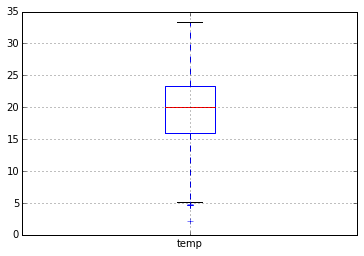

In [27]:
sdf_1.boxplot('temp')

{'boxes': [<matplotlib.lines.Line2D at 0xbb3cb70>],
 'caps': [<matplotlib.lines.Line2D at 0xbb4aa20>,
 'fliers': [<matplotlib.lines.Line2D at 0xbb58ac8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xbb58550>],
 'whiskers': [<matplotlib.lines.Line2D at 0xbb3ce80>,
  <matplotlib.lines.Line2D at 0xbb4a4a8>]}

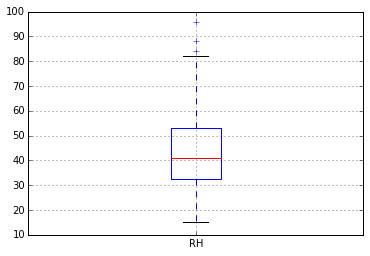

In [28]:
sdf_1.boxplot('RH')

{'boxes': [<matplotlib.lines.Line2D at 0xbbc6b38>],
 'caps': [<matplotlib.lines.Line2D at 0xbbd3a58>,
 'fliers': [<matplotlib.lines.Line2D at 0xbd8bb00>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xbd8b588>],
 'whiskers': [<matplotlib.lines.Line2D at 0xbbc6eb8>,
  <matplotlib.lines.Line2D at 0xbbd34e0>]}

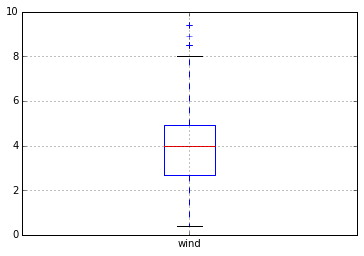

In [29]:
sdf_1.boxplot('wind')

{'boxes': [<matplotlib.lines.Line2D at 0xe5f6438>],
 'caps': [<matplotlib.lines.Line2D at 0xe605390>,
 'fliers': [<matplotlib.lines.Line2D at 0xe612438>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xe605e80>],
 'whiskers': [<matplotlib.lines.Line2D at 0xe5f67f0>,
  <matplotlib.lines.Line2D at 0xe5f6dd8>]}

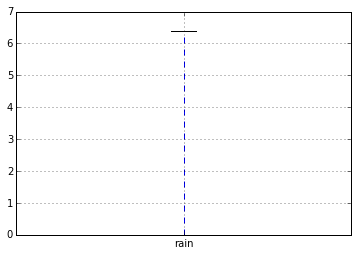

In [30]:
sdf_1.boxplot('rain')

In [31]:
sdf_2.describe()

,temp,RH,wind,rain,area
count,258.000000,258.000000,258.000000,258.000000,258.000000
mean,18.504264,44.961240,3.897287,0.013178,0.014186
std,5.277470,17.324508,1.668719,0.098138,0.072597
min,4.200000,15.000000,0.900000,0.000000,0.000000
25%,15.400000,33.000000,2.700000,0.000000,0.000000
50%,18.650000,42.000000,3.600000,0.000000,0.000000
75%,21.700000,54.000000,5.275000,0.000000,0.000000
max,32.400000,100.000000,8.500000,1.000000,0.520000


{'boxes': [<matplotlib.lines.Line2D at 0xe81a828>],
 'caps': [<matplotlib.lines.Line2D at 0xe82a518>,
 'fliers': [<matplotlib.lines.Line2D at 0xe8355c0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xe835048>],
 'whiskers': [<matplotlib.lines.Line2D at 0xe81aa58>,
  <matplotlib.lines.Line2D at 0xe81af60>]}

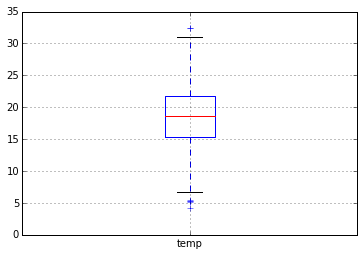

In [32]:
sdf_2.boxplot('temp')

{'boxes': [<matplotlib.lines.Line2D at 0xea462b0>],
 'caps': [<matplotlib.lines.Line2D at 0xea46f60>,
 'fliers': [<matplotlib.lines.Line2D at 0xea5f048>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xea53a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0xea464e0>,
  <matplotlib.lines.Line2D at 0xea469e8>]}

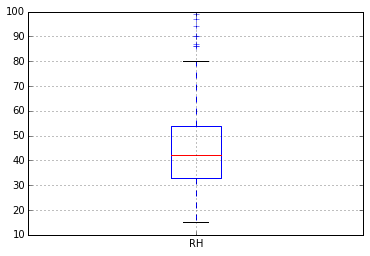

In [33]:
sdf_2.boxplot('RH')

{'boxes': [<matplotlib.lines.Line2D at 0xec2f748>],
 'caps': [<matplotlib.lines.Line2D at 0xec3e438>,
 'fliers': [<matplotlib.lines.Line2D at 0xec4c4e0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xec3ef28>],
 'whiskers': [<matplotlib.lines.Line2D at 0xec2f588>,
  <matplotlib.lines.Line2D at 0xec2fe80>]}

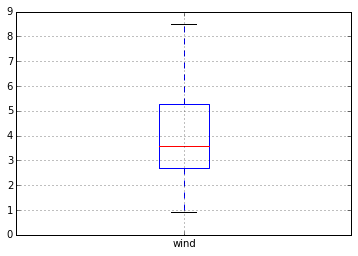

In [34]:
sdf_2.boxplot('wind')

{'boxes': [<matplotlib.lines.Line2D at 0xee54be0>],
 'caps': [<matplotlib.lines.Line2D at 0xee638d0>,
 'fliers': [<matplotlib.lines.Line2D at 0xee70978>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xee70400>],
 'whiskers': [<matplotlib.lines.Line2D at 0xee54d30>,
  <matplotlib.lines.Line2D at 0xee63358>]}

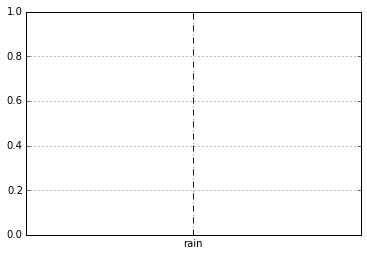

In [35]:
sdf_2.boxplot('rain')

## 나름대로의 해석
- sdf_1이 불이 많이 나는 지역 , sdf_2를 불이 적게 나는 지역이라고 한다면, 평균온도가 높을수록, 습도가 낮을수록, 바람이 셀수록 불이 많이 난다는 걸 알 수 있다. 일반적인 상식과도 맞아 떨어진다.

- 일반적으로불이 많이 나는 지역이 강수량의 적을 것으로 예상되어 진다. 그러나 주어진 자료에서 강수량은 sdf_1이 평균은 높다. 하지만 표준편차까지 같이 고려하고, 지역 전체적으로 강수량이 많지 않다는 걸 감안하면 크게 이상한 측정값은 아니고 약간의 예외라고 생각할 수 있을 것이다.

- sdf_1과 sdf_2의 각 temp,RH,wind는 어느정도 sdf의 분포와 비슷하게 맞아 떨어진다. area에 따라서 구간을 나눴지만 이렇게 분포가 비슷하게 가는 것이 통계의 신비라고 생각되어진다.

##[Mission 5] 단일변수 선형 회귀분석을 통하여 가장 영향이 높은 속성 선발
이전 문제에서 log(1 + area) 값이 50% percentile 이상인 것과 50% percentile 으로 구분지은 것은 무시하고 전체 area 값에 대한 회귀 분석 수행
이전 문제에서 area의 값에 자연로그를 취하여 변환하는 것은 수행하지 마시오.
원래 area 데이터에 대한 선형회귀 분석 수행
다음 요인들 중 area와 가장 연관성이 높은 주요 요인을 선정
FFMC
DMC
DC
ISI
temp
RH
wind
rain

In [36]:
sdf = df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']]
sdf

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


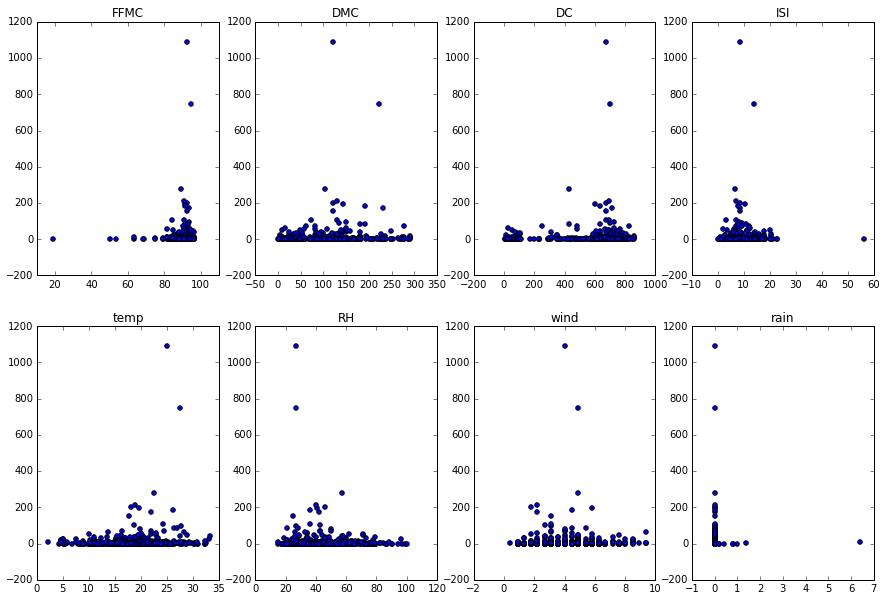

In [37]:
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(241)
ax1.scatter(sdf['FFMC'], sdf['area'])
ax1.set_title("FFMC")

ax2=fig.add_subplot(242)
ax2.scatter(sdf['DMC'], sdf['area'])
ax2.set_title("DMC")

ax3=fig.add_subplot(243)
ax3.scatter(sdf['DC'], sdf['area'])
ax3.set_title("DC")

ax4=fig.add_subplot(244)
ax4.scatter(sdf['ISI'], sdf['area'])
ax4.set_title("ISI")

ax5=fig.add_subplot(245)
ax5.scatter(sdf['temp'], sdf['area'])
ax5.set_title("temp")

ax6=fig.add_subplot(246)
ax6.scatter(sdf['RH'], sdf['area'])
ax6.set_title("RH")

ax7=fig.add_subplot(247)
ax7.scatter(sdf['wind'], sdf['area'])
ax7.set_title("wind")

ax8=fig.add_subplot(248)
ax8.scatter(sdf['rain'], sdf['area'])
ax8.set_title("rain")

In [38]:
predicator_analysis = {}
for i in range(0, 8):
    predicator_analysis[i] = Series(np.empty(6), index=['slope', 'intercept', 'r_value', 'r_squared', 'p_value', 'std_err'])
    predicator_analysis[i][0],\
    predicator_analysis[i][1],\
    predicator_analysis[i][2],\
    predicator_analysis[i][4],\
    predicator_analysis[i][5] = stats.linregress(sdf[sdf.columns[i]].values, sdf['area'].values)
    predicator_analysis[i][3] = predicator_analysis[i][2] ** 2


    
format1 = "%3s %15s %15s %15s %15s %15s %15s"
format2 = "%3d %15f %15f %15f %15f %15f %15f"
print format1 % ('No.', 'slope', 'intercept', 'r_value', 'r_squared', 'p_value', 'std_err')
for i in range(0, 8):
    lst = [i]
    for j in range(6):
        lst.append(predicator_analysis[i][j])
    print format2 % tuple(lst)

No.           slope       intercept         r_value       r_squared         p_value         std_err
  0        0.462672      -29.091436        0.040122        0.001610        0.362592        0.507735
  1        0.072549        4.803609        0.072994        0.005328        0.097335        0.043680
  2        0.012672        5.903719        0.049383        0.002439        0.262363        0.011294
  3        0.115287       11.807209        0.008258        0.000068        0.851418        0.615183
  4        1.072628       -7.413752        0.097844        0.009573        0.026101        0.480753
  5       -0.294604       25.894785       -0.075519        0.005703        0.086271        0.171411
  6        0.437622       11.089102        0.012317        0.000152        0.779939        1.565481
  7       -1.584244       12.881612       -0.007366        0.000054        0.867310        9.477439


## 선형회귀 분석 결과
0=FFMC ,1=DMC, 2=DC, 3=ISI, 4=temp, 5=RH, 6=wind, 7=rain

- area와 가장 연관성이 높은 주요 요인은 4번 temp라고 할 수 있겠다. 유의확률 p_value 값이 0.05미만이면서 가장 낮기 때문이다.

- 유의확률 p-value가 0.05 미만인게 있는지 찾아보면, 4번 temp가 있다. 즉 temp는 area와 상관관계가 있다고 할 수 있다. temp의 r-value는 0.097844이므로 area와 양의 상관관계가 있다고 할 수 있다. 즉 온도가 높으면 불이 더 많이 난다고 할 수 있다.

- 유의확률이 그다음으로 낮은 것은 5번 RH(습도)이다. 습도의 r_value는 -0.075519이므로 area와는 음의 상관관계에 있다고 할 수 있다. 즉, 습도가 낮으면 불이 더 많이 난다고 할 수 있다. 


## [Mission 6] 가장 영향이 높은 요인 두 개로 다변수 선형 회귀분석 수행
전체 517개의 데이터에 대한 area 값과 선형회귀 분석 결과인 predicted area 값을 모두 한꺼번에 출력하여 비교하시오.
선형 회귀분석 성능이 좋은지 자신의 의견을 제시하시오.

## 0부터 차례대로 FFMC, DMC, DC, ISI, temp, RH, wind, rain

In [39]:
predicator_analysis = {}
for i in range(0, 8):
    predicator_analysis[i] = Series(np.empty(6), index=['slope', 'intercept', 'r_value', 'r_squared', 'p_value', 'std_err'])
    predicator_analysis[i][0],\
    predicator_analysis[i][1],\
    predicator_analysis[i][2],\
    predicator_analysis[i][4],\
    predicator_analysis[i][5] = stats.linregress(sdf[sdf.columns[i]].values, sdf['area'].values)
    predicator_analysis[i][3] = predicator_analysis[i][2] ** 2


    
format1 = "%3s %15s %15s %15s %15s %15s %15s"
format2 = "%3d %15f %15f %15f %15f %15f %15f"
print format1 % ('No.', 'slope', 'intercept', 'r_value', 'r_squared', 'p_value', 'std_err')
for i in range(0, 8):
    lst = [i]
    for j in range(6):
        lst.append(predicator_analysis[i][j])
    print format2 % tuple(lst)

No.           slope       intercept         r_value       r_squared         p_value         std_err
  0        0.462672      -29.091436        0.040122        0.001610        0.362592        0.507735
  1        0.072549        4.803609        0.072994        0.005328        0.097335        0.043680
  2        0.012672        5.903719        0.049383        0.002439        0.262363        0.011294
  3        0.115287       11.807209        0.008258        0.000068        0.851418        0.615183
  4        1.072628       -7.413752        0.097844        0.009573        0.026101        0.480753
  5       -0.294604       25.894785       -0.075519        0.005703        0.086271        0.171411
  6        0.437622       11.089102        0.012317        0.000152        0.779939        1.565481
  7       -1.584244       12.881612       -0.007366        0.000054        0.867310        9.477439


In [40]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [41]:
sdf_3 = sdf[['temp','RH']]
sdf_3

,temp,RH
0,8.2,51
1,18.0,33
2,14.6,33
3,8.3,97
4,11.4,99
5,22.2,29
6,24.1,27
7,8.0,86
8,13.1,63
9,22.8,40


In [42]:
X=zip(sdf['temp'], sdf['RH'])
print X
y=sdf['area'].values

[(8.1999999999999993, 51), (18.0, 33), (14.6, 33), (8.3000000000000007, 97), (11.4, 99), (22.199999999999999, 29), (24.100000000000001, 27), (8.0, 86), (13.1, 63), (22.800000000000001, 40), (17.800000000000001, 51), (19.300000000000001, 38), (17.0, 72), (21.300000000000001, 42), (26.399999999999999, 21), (22.899999999999999, 44), (15.1, 27), (16.699999999999999, 47), (15.9, 35), (9.3000000000000007, 44), (18.300000000000001, 40), (19.100000000000001, 38), (21.0, 44), (19.5, 43), (23.699999999999999, 32), (16.300000000000001, 60), (19.0, 34), (19.399999999999999, 48), (30.199999999999999, 24), (22.800000000000001, 39), (25.399999999999999, 24), (11.199999999999999, 78), (20.600000000000001, 37), (17.699999999999999, 39), (21.199999999999999, 32), (18.199999999999999, 62), (21.699999999999999, 24), (11.300000000000001, 60), (17.800000000000001, 27), (14.1, 43), (23.300000000000001, 37), (18.399999999999999, 42), (16.600000000000001, 54), (19.600000000000001, 48), (12.9, 74), (25.89999999

In [43]:
regr = regr.fit(X,y)

print 'Coefficients:', regr.coef_
print 'Intercept:', regr.intercept_

Coefficients: [ 0.8810733  -0.12925007]
Intercept: 1.92880310331


선형 회귀식 : y = 1.92880310331 + (0.8810733xtemp)-(0.12925007xRH)

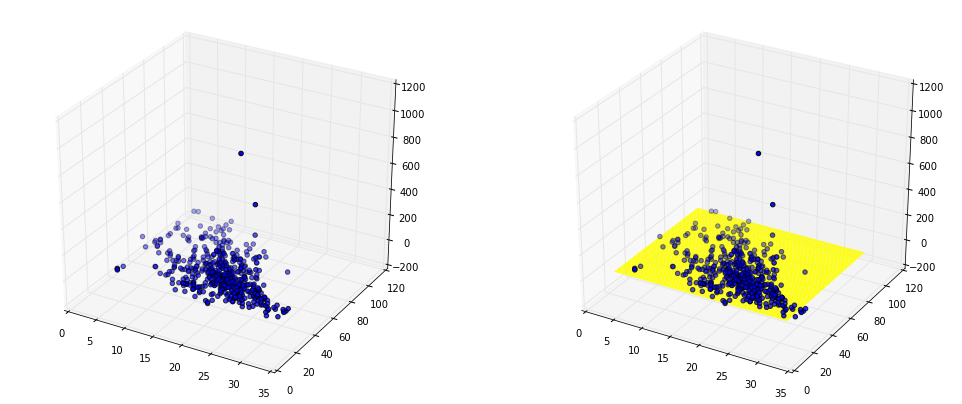

In [44]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(17, 7))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(sdf['temp'], sdf['RH'], sdf['area'])

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(sdf['temp'], sdf['RH'], sdf['area'])
# create x,y
xx, yy = np.meshgrid(range(int(sdf['temp'].min()), int(sdf['temp'].max())), range(int(sdf['RH'].min()), int(sdf['RH'].max())))
# calculate corresponding z
z = 1.1392 + 0.0021 * xx - 0.0254 * yy
ax2.plot_surface(xx, yy, z, rstride=1, cstride=1, linewidth=0, color="yellow", shade=False)

## 다변수에서는 잘모르겠지만 단일변수 회귀분석에서는 좋은 효율을 보여주는 것 같다. 단일변수 회귀분석 결과를 보면 각 변수마다 얼마나 영향을 끼치는지가 수치적으로 잘 파악이 되고  p_value가 0.05 이하인 값이 나오면 충분히 통계학적으로 인정받을 수 있는 자료들이 나오기 때문이다.

##[Mission 7] 가장 영향이 높은 요인 두 개로 다변수 로지스틱 회귀분석 수행
area의 값의 편차가 너무 심하기 때문에 그러한 편차를 줄이기 위하여 numpy.log1p (자연로그) 사용
Calculates log(1 + x)
http://docs.scipy.org/doc/numpy/reference/generated/numpy.log1p.html#numpy.log1p
새로운 Categorical Variable로서 0 및 1을 지니는 'fire' 컬럼 생성
두 가지 부류로 나누는 기준은 log(1 + area) 값이 50% percentile 이상인 것과 50% percentile 이하인 것으로 정함
log(1 + area) 값이 50% percentile 이상이면 'fire' 컬럼 값이 1
log(1 + area) 값이 50% percentile 이하이면 'fire' 컬럼 값이 0
로지스틱 회귀분석에 의한 분류의 정확도를 최종적으로 출력하시오.

In [114]:
sdf = df[['temp', 'RH', 'area']]
sdf_1=sdf.sort_index(by="area",ascending=False).head(259)
sdf_2=sdf.sort_index(by="area",ascending=False).tail(258)
sdf_1.insert(3,'fire',1)
sdf_2.insert(3,'fire',0)

In [119]:
sdf_3=sdf_1.append(sdf_2)

In [120]:
sdf_3

,temp,RH,area,fire
238,25.1,27,1090.84,1
415,27.5,27,746.28,1
479,22.6,57,278.53,1
237,18.8,40,212.88,1
236,18.2,46,200.94,1
235,19.6,41,196.48,1
420,26.2,36,185.76,1
377,21.9,42,174.63,1
234,17.7,25,154.88,1
233,24.3,36,105.66,1


In [122]:
attributes = sdf_3.iloc[:, 0:2]
weather_data = attributes.values
weather_data

array([[ 25.1,  27. ],
       [ 27.5,  27. ],
       [ 22.6,  57. ],
       ..., 
       [ 15.8,  27. ],
       [ 18.9,  35. ],
       [ 11.8,  31. ]])

In [123]:
target_series = sdf_3.iloc[:, 3]
weather_target=target_series.values
weather_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [124]:
regr2=linear_model.LogisticRegression()
regr2.fit(weather_data, weather_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [125]:
print 'Coefficients:', regr2.coef_
print 'Intercept:', regr2.intercept_

Coefficients: [[ 0.01898152 -0.0018635 ]]
Intercept: [-0.27009061]


In [128]:
predicted=[]
for i in range(0, len(weather_data)):
    predicted.append(regr2.predict(weather_data[i]))
    
sdf_3.loc[:, 'predicted'] = predicted
sdf_3

,temp,RH,area,fire,predicted
238,25.1,27,1090.84,1,1
415,27.5,27,746.28,1,1
479,22.6,57,278.53,1,1
237,18.8,40,212.88,1,1
236,18.2,46,200.94,1,0
235,19.6,41,196.48,1,1
420,26.2,36,185.76,1,1
377,21.9,42,174.63,1,1
234,17.7,25,154.88,1,1
233,24.3,36,105.66,1,1


In [129]:
correctly_predicted = 0
for i in range(0, len(weather_data)):
    if predicted[i] == weather_target[i]:
        correctly_predicted += 1
        
print float(correctly_predicted) / len(weather_data)

0.539651837524


## 온도와 습도로 다변수 로지스틱 회귀분석 결과 분류의 정확도는 약 53.9퍼센트

## 정확도가 낮은 이유는 아무래도 온도같은 경우엔 p-value가 0.05 이하로 통계학적으로 충분히 연관히 있다고 할 수 있지만 습도는 p-value가 0.05이하를 만족하지 않으므로 큰 상관관계가 없다고 볼 수 있다. 그런데 이 2변수를 모두 반영할 경우 습도때문에 정확도가 하락되는 걸로 생각됨